In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('realestate_prices.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             21613 non-null  bool 
 1   date           21613 non-null  bool 
 2   price          21613 non-null  bool 
 3   bedrooms       21613 non-null  bool 
 4   bathrooms      21613 non-null  bool 
 5   sqft_living    21613 non-null  bool 
 6   sqft_lot       21613 non-null  bool 
 7   floors         21613 non-null  bool 
 8   waterfront     21613 non-null  bool 
 9   view           21613 non-null  bool 
 10  condition      21613 non-null  bool 
 11  grade          21613 non-null  bool 
 12  sqft_above     21613 non-null  bool 
 13  sqft_basement  21613 non-null  bool 
 14  yr_built       21613 non-null  bool 
 15  yr_renovated   21613 non-null  bool 
 16  zipcode        21613 non-null  bool 
 17  lat            21613 non-null  bool 
 18  long           21613 non-null  bool 
 19  sqft

<Axes: xlabel='sqft_living', ylabel='price'>

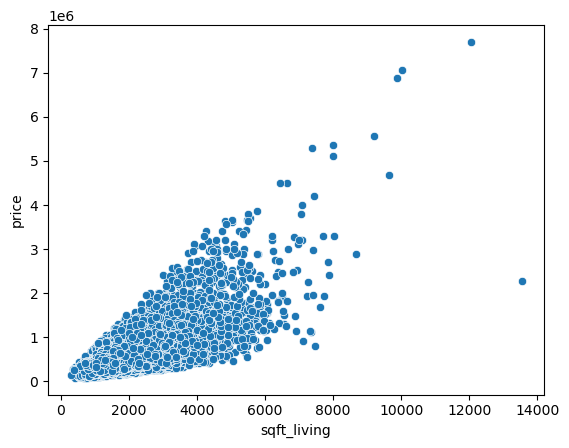

In [9]:
sns.scatterplot(x=df['sqft_living'], y=df['price'])

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

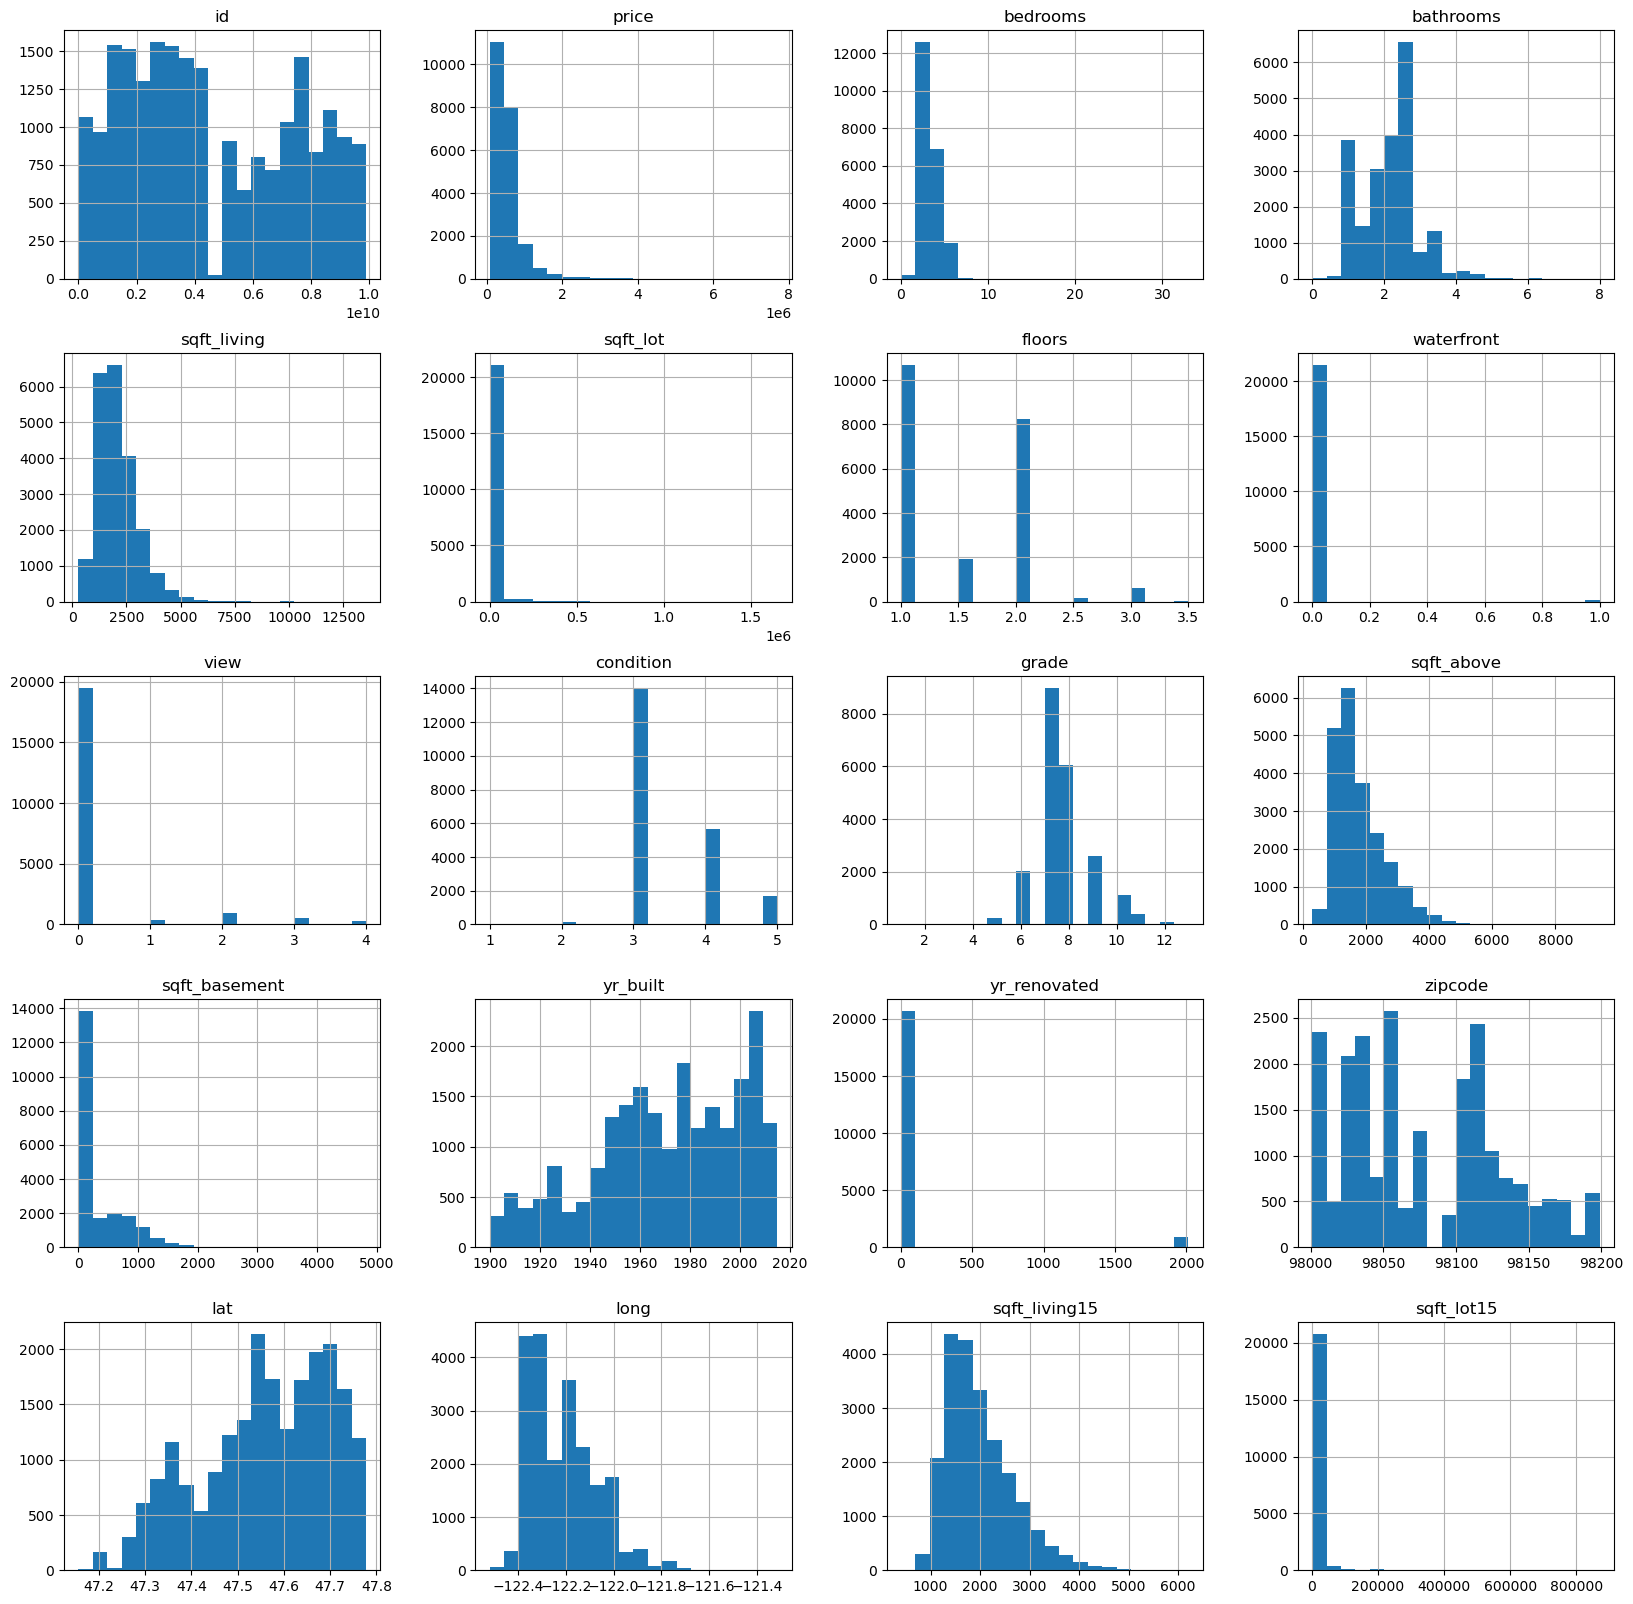

In [11]:
df.hist(bins=20, figsize=(20,20))

In [13]:
df=df.drop(['date'],axis=1)

<Axes: >

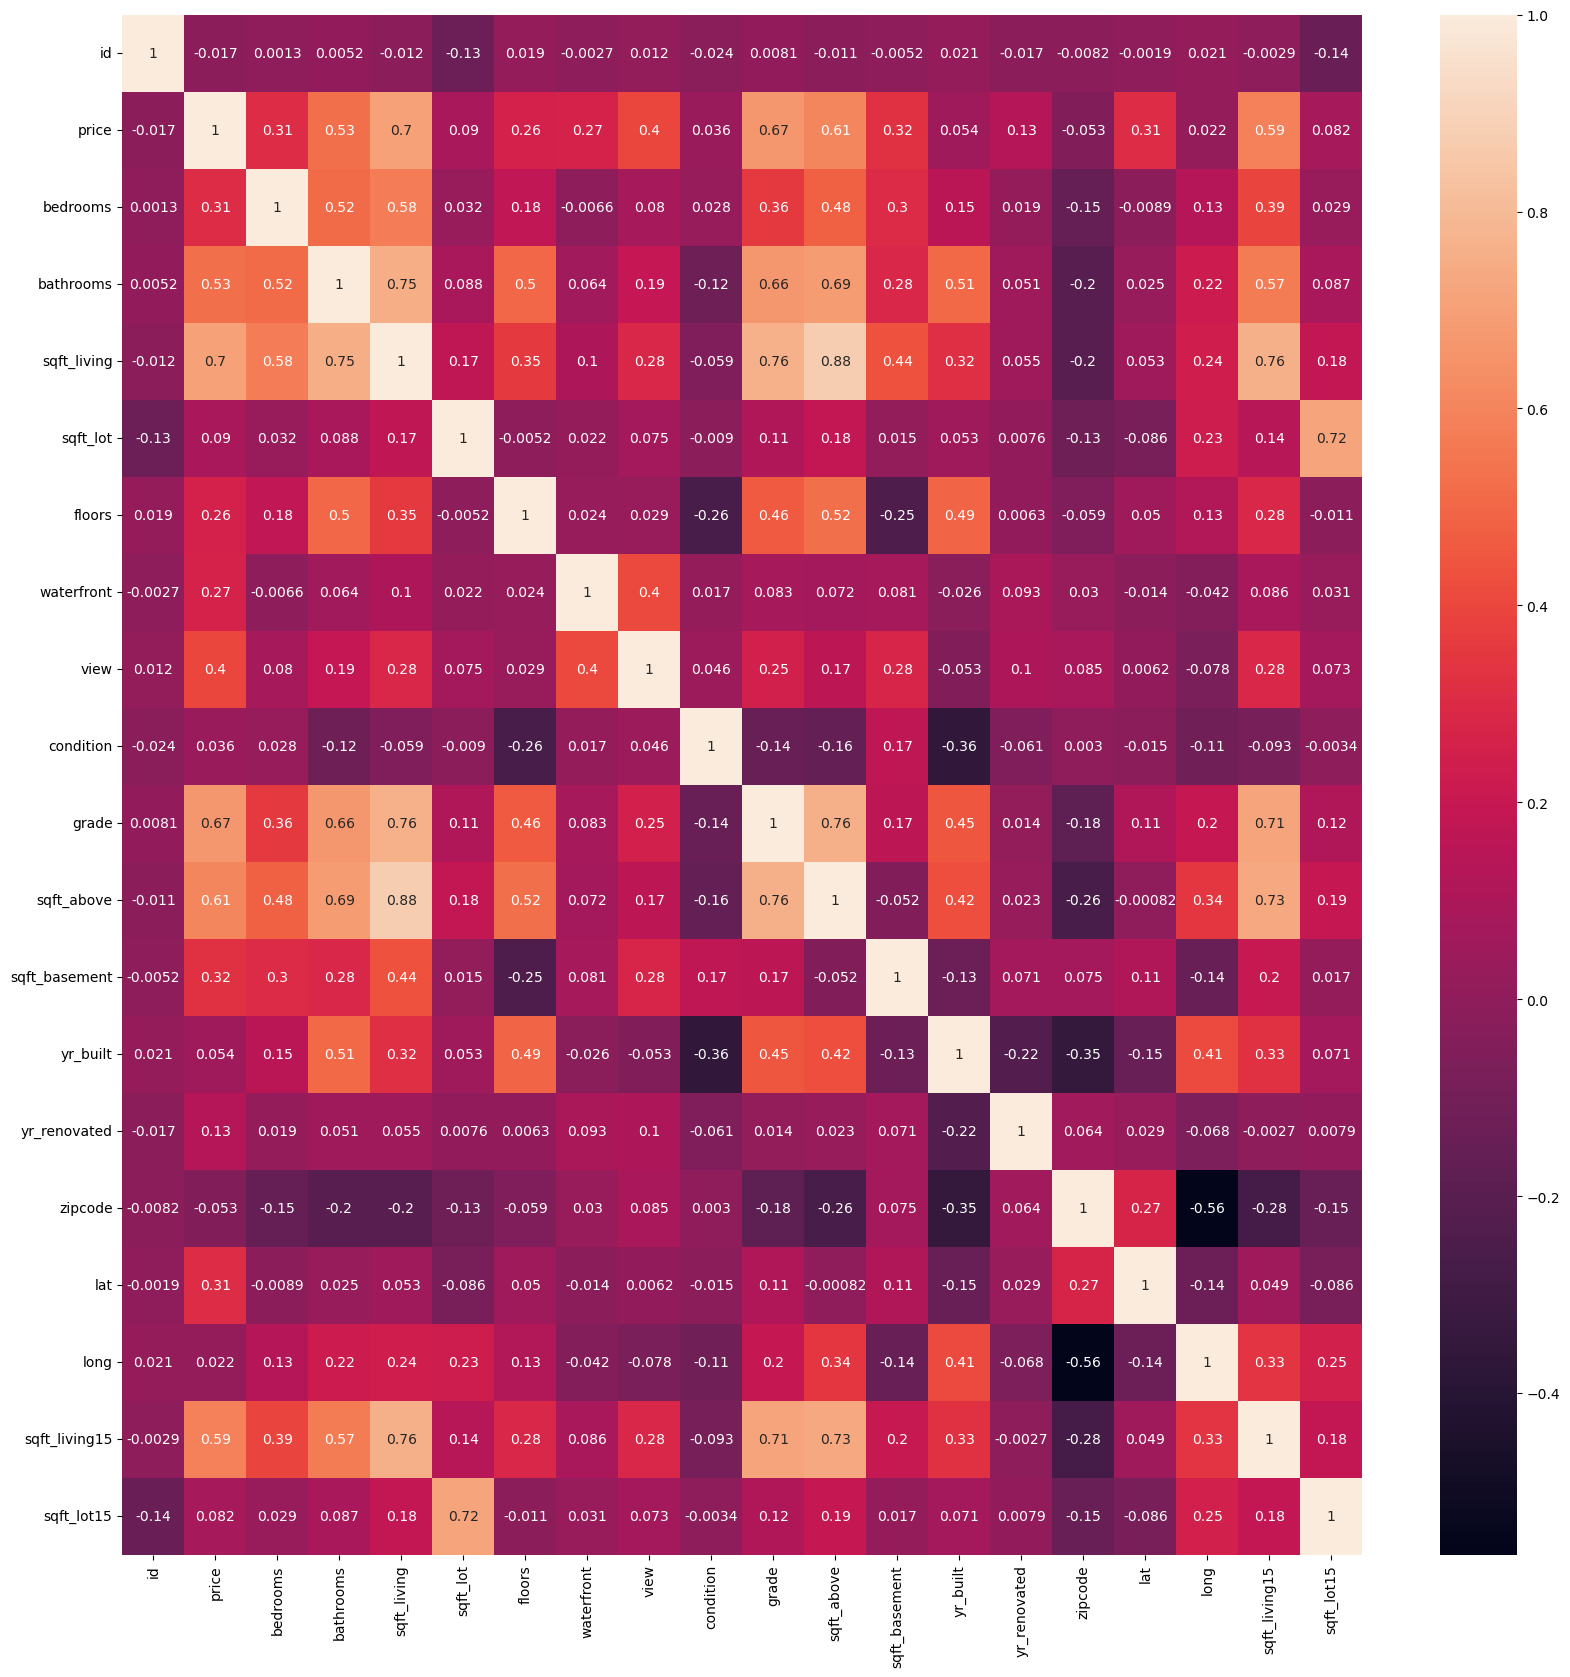

In [15]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [17]:
selected_features=['bedrooms','bathrooms','sqft_living','sqft_lot','grade','sqft_above','sqft_living15','view','lat','sqft_basement','floors',
                  'yr_renovated','waterfront']

In [19]:
X = df[selected_features]

In [21]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_living15,view,lat,sqft_basement,floors,yr_renovated,waterfront
0,3,1.00,1180,5650,7,1180,1340,0,47.5112,0,1.0,0,0
1,3,2.25,2570,7242,7,2170,1690,0,47.7210,400,2.0,1991,0
2,2,1.00,770,10000,6,770,2720,0,47.7379,0,1.0,0,0
3,4,3.00,1960,5000,7,1050,1360,0,47.5208,910,1.0,0,0
4,3,2.00,1680,8080,8,1680,1800,0,47.6168,0,1.0,0,0


In [23]:
Y = df['price']

In [25]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scaled_X = scalar.fit_transform(X)

In [27]:
Y = Y.values.reshape(-1,1)

In [29]:
scaled_Y = scalar.fit_transform(Y)

In [31]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(scaled_X, scaled_Y, test_size = 0.25)

In [33]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=13, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='linear'))

C:\Users\divya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │         2,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,851 (167.39 KB)

 Trainable params: 42,851 (167.39 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [39]:
history = model.fit(xtrain,ytrain,epochs=100,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0034 - val_loss: 0.0010
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.3484e-04 - val_loss: 8.6344e-04
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.0179e-04 - val_loss: 8.0763e-04
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.2345e-04 - val_loss: 7.2717e-04
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.9704e-04 - val_loss: 7.0326e-04
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.7714e-04 - val_loss: 6.6356e-04
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.9801e-04 - val_loss: 7.0537e-04
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.8315e-04 - val_loss: 6.0428e-04
Epoch 9/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.0934e-04 - val_loss: 5.6731e-04
Epoch 10/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.3787e-04 - val_loss: 5.7898e-04
Epoch 11/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - l

In [41]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

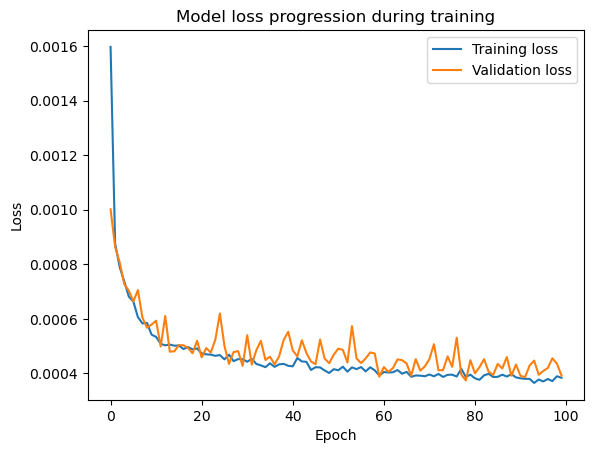

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss progression during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss','Validation loss'])

In [45]:
predictions = model.predict(xtest)

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


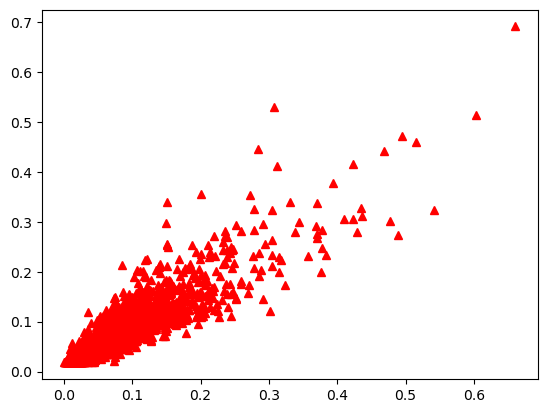

In [47]:
plt.plot(ytest, predictions,'^',color='r')

In [49]:
predictions_org = scalar.inverse_transform(predictions)
Y_org = scalar.inverse_transform(ytest)

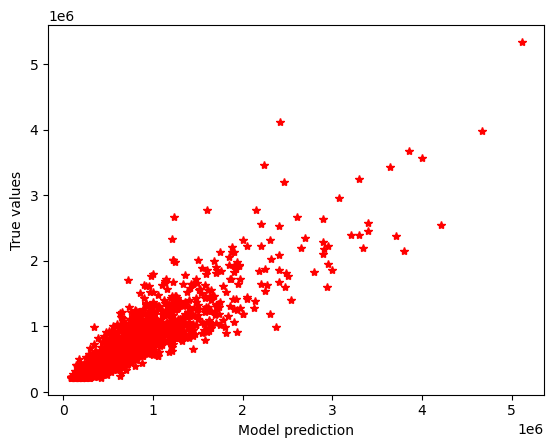

In [51]:
plt.plot(Y_org, predictions_org, '*', color='r')
plt.xlabel('Model prediction')
plt.ylabel('True values')
plt.show()

In [53]:
from sklearn.metrics import r2_score
r2_score(Y_org, predictions_org)

0.8262235054788378

In [55]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_org, predictions_org)

90509.91398732421